# 📦 EDA Orders – Shopee Analytics

Analisis data pesanan dari pengguna Shopee. Kita akan melihat tren pesanan, status pengiriman, serta distribusi waktu pengiriman.

In [5]:
# 📌 Cell 1: Judul & Import


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_orders = pd.read_csv("../data/raw/orders.csv", parse_dates=["order_date", "estimated_delivery"])
df_orders.head()

,order_id,user_id,order_date,status,estimated_delivery
0,O000001,U00439,2023-08-11,delivered,2023-08-13
1,O000002,U00503,2024-08-07,delivered,2024-08-12
2,O000003,U02391,2025-06-23,delivered,2025-06-30
3,O000004,U04244,2024-07-26,delivered,2024-07-30
4,O000005,U04680,2023-02-02,canceled,2023-02-05


## 🚚 Distribusi Status Pemesanan

Kita ingin tahu seberapa banyak pesanan yang berhasil dikirim, dibatalkan, atau dikembalikan.

C:\Users\iksan\AppData\Local\Temp\ipykernel_25220\3693797546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_orders, x='status', palette='Set1')


📁 Chart saved to outputs/charts/order_status_distribution.png


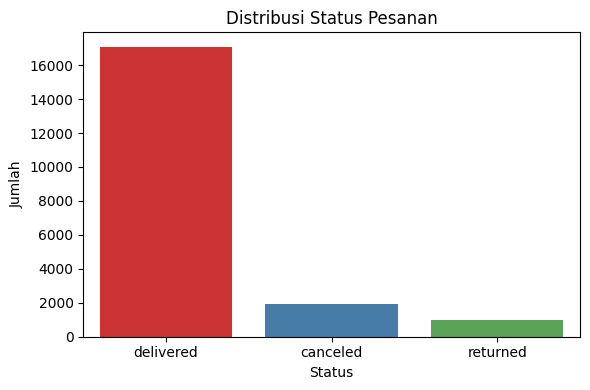

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_orders, x='status', palette='Set1')
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()

save_plot(plt.gcf(), "order_status_distribution.png")
plt.show()

## 📈 Tren Pemesanan per Bulan

Apakah ada tren naik/turun pesanan dari waktu ke waktu?

📁 Chart saved to outputs/charts/monthly_orders.png


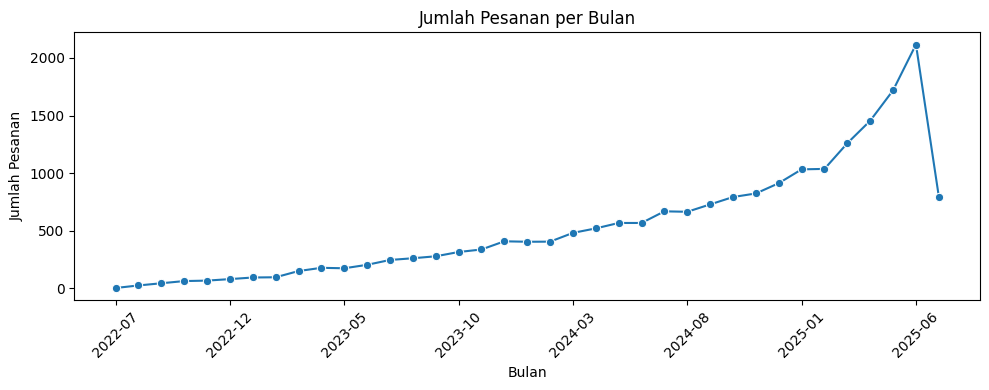

In [8]:
df_orders['month'] = df_orders['order_date'].dt.to_period("M").astype(str)
monthly_orders = df_orders.groupby('month').size().reset_index(name='order_count')

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_orders, x='month', y='order_count', marker='o')

# Ambil setiap 5 bulan untuk xticks
months = monthly_orders['month']
plt.xticks(ticks=range(0, len(months), 5), labels=months[::5], rotation=45)
plt.title("Jumlah Pesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.tight_layout()

save_plot(plt.gcf(), "monthly_orders.png")
plt.show()

## ⏱️ Rata-Rata Waktu Pengiriman

Berapa lama waktu pengiriman dari tanggal order hingga estimasi tiba?

📁 Chart saved to outputs/charts/delivery_days_distribution.png


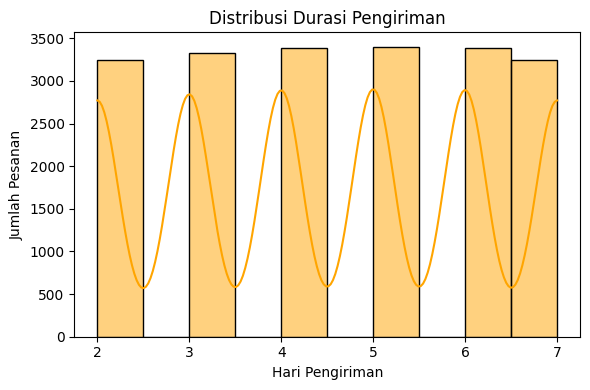

In [9]:
df_orders['delivery_days'] = (df_orders['estimated_delivery'] - df_orders['order_date']).dt.days

plt.figure(figsize=(6, 4))
sns.histplot(df_orders['delivery_days'], bins=10, kde=True, color='orange')
plt.title("Distribusi Durasi Pengiriman")
plt.xlabel("Hari Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.tight_layout()

save_plot(plt.gcf(), "delivery_days_distribution.png")
plt.show()

## 📝 Insight Ringkas Orders

- Mayoritas pesanan berhasil dikirim (`delivered`).
- Tren pesanan per bulan menunjukkan pertumbuhan stabil.
- Rata-rata waktu pengiriman sekitar 3–5 hari.

Selanjutnya kita bisa analisis produk yang paling banyak dipesan dan metode pembayaran.